## Exploratory Data Analysis and Classification of Iris Flower Species using K-Nearest Neighbors (KNN) Algorithm

## objective:
The main objective of this project is to analyze the Iris dataset through Exploratory Data Analysis (EDA) to understand its structure, features, and relationships, and then apply the K-Nearest Neighbors (KNN) algorithm to accurately classify the Iris flower species based on their measured characteristics.

## Project Goals
1)Perform Exploratory Data Analysis (EDA) to summarize the dataset using statistical and visualization techniques.
2)Understand feature distributions and detect any patterns, correlations, or separability among classes.
3)Preprocess the data by handling missing values (if any), scaling numerical features, and splitting into training and testing sets.
4)Implement the K-Nearest Neighbors algorithm from scratch or using Scikit-learn to classify Iris species.
5)Optimize model performance by selecting the best value of k and evaluating metrics like accuracy, confusion matrix, and classification report.
6)Make predictions on new data points and interpret model behavior.

# Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  # this also use to load dataset 


# step1: Load and explore the dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()
#There are 4 features: Sepal length, sepal width, petal length and petal width.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape
##There are 150 rows and 5 columns

(150, 5)

In [4]:
iris.isnull().sum()  #there is no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#statistical details about the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.columns  #column names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [45]:
#  Features and target
X = df.drop("species", axis=1)
y = df["species"]
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[149 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 149, dtype: object


### Drop Unwanted Columns - For Option 1
iris = iris.drop(columns=['Id'])

In [8]:
# check datatype and duplicate rows
print(iris.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
print(iris.duplicated().sum())

1


In [10]:
df = iris.drop_duplicates()

# step2:  ANALYSIS
## Univarient analysis
perform single variable analysis using histograms,boxplot
Goal: Understand its distribution, central tendency, and spread.

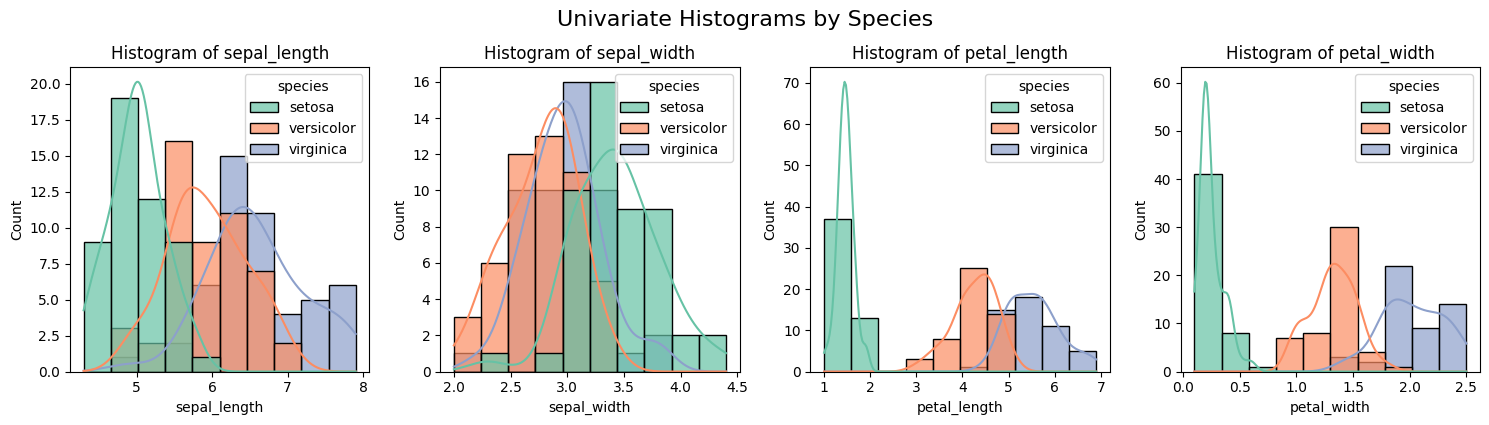

In [11]:
# histogram
# Select numeric features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Set figure size
plt.figure(figsize=(15, 4))  # width, height

# Create subplots for each feature
for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(
        data=iris,
        x=col,
        hue='species',          # color by species
        bins=10,
        kde=True,               # smooth histogram using KDE
        palette='Set2',
        alpha=0.7
    )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Univariate Histograms by Species', fontsize=16, y=1.05)
plt.savefig('iris_histograms_by_species.png', dpi=300)
plt.show()


# observation
Sepal length and sepal width are almost similar across all three species,
but petal length and petal width are clearly different — especially for setosa.”
| Feature                  | Observation                                                           | Meaning                                                                               |
| ------------------------ | --------------------------------------------------------------------- | ---------------------------------------------------
| **Sepal Length / Width** -- Overlapping distributions for *setosa*, *versicolor*, and *virginica* | These features **don’t separate species clearly** they have similar ranges.        
| **Petal Length / Width** | *Setosa* distribution is clearly **separate** from the others         | These features **strongly differentiate** *setosa* from *versicolor* and *virginica*. 
Petal measurements are much more informative for classification (i.e., good predictors).
Sepal measurements contribute less since their values overlap for all species.
This is why, in machine learning models like KNN or Logistic Regression,
Petal features play a bigger role in predicting the correct species.

C:\Users\varma\AppData\Local\Temp\ipykernel_6440\4062915473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\4062915473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\4062915473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\4062915473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

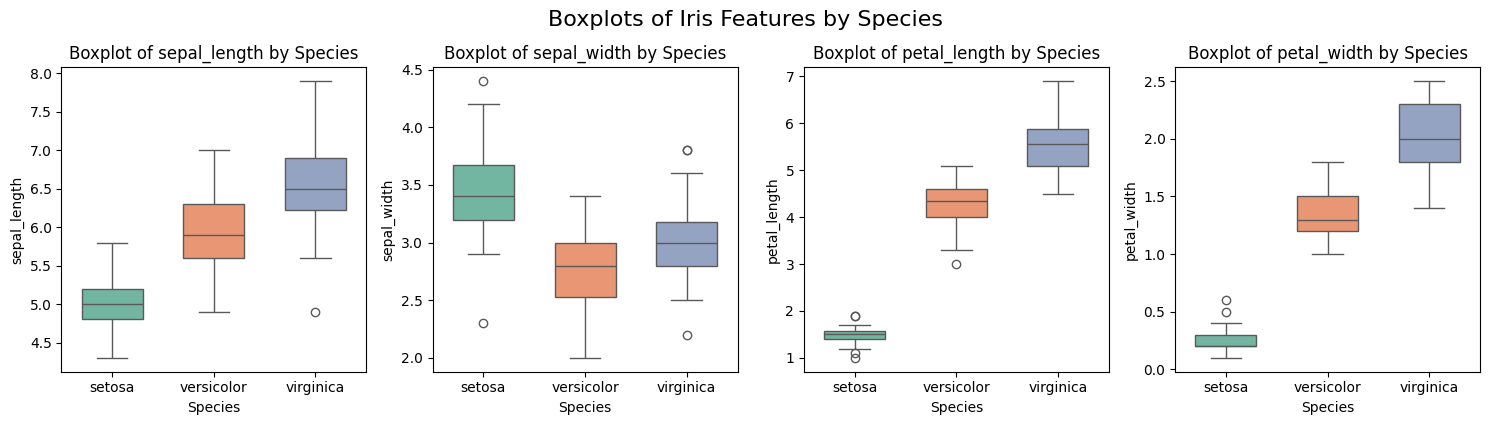

In [12]:
#Boxplot
# Set figure size
plt.figure(figsize=(15, 4))  # width, height

# Create subplots for each feature
for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(
        data=iris,
        x='species',       # categorical variable
        y=col,             # numerical feature
        palette='Set2',
        width=0.6
    )
    plt.title(f'Boxplot of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle('Boxplots of Iris Features by Species', fontsize=16, y=1.05)
plt.savefig('iris_boxplots_by_species.png', dpi=300)
plt.show()

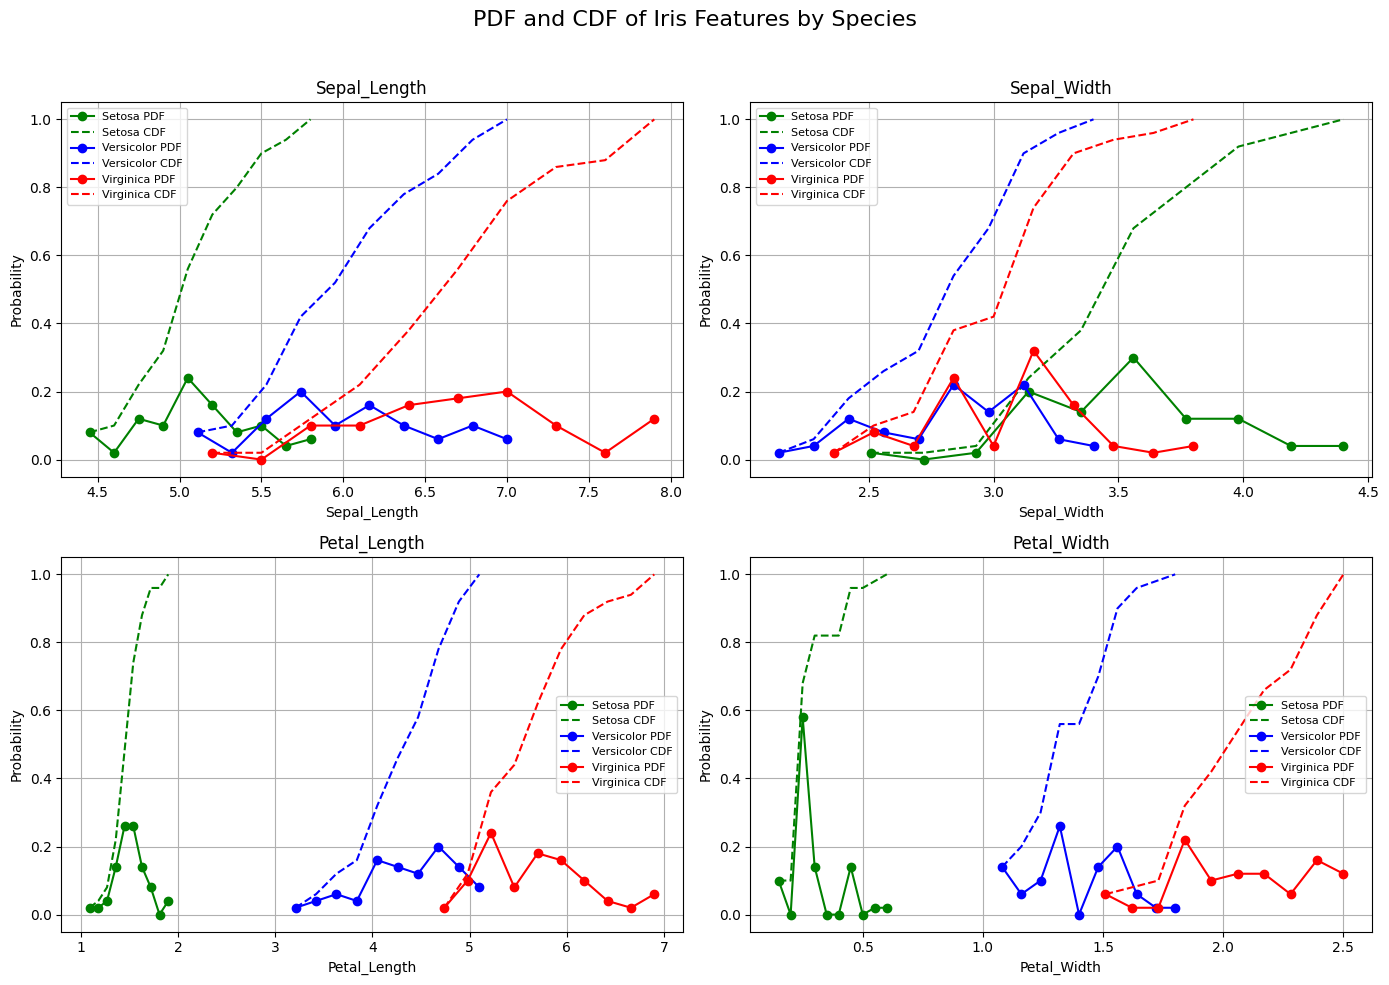

In [13]:
# Set up 2x2 subplot layout
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)

    # Separate data by species
    setosa = iris.loc[iris['species'] == 'setosa', feature]
    versicolor = iris.loc[iris['species'] == 'versicolor', feature]
    virginica = iris.loc[iris['species'] == 'virginica', feature]

    # Function to compute PDF and CDF
    def pdf_cdf(data, bins=10):
        counts, bin_edges = np.histogram(data, bins=bins, density=True)
        pdf = counts / sum(counts)
        cdf = np.cumsum(pdf)
        return bin_edges[1:], pdf, cdf

    # Compute PDF and CDF for all species
    x_s, pdf_s, cdf_s = pdf_cdf(setosa)
    x_v, pdf_v, cdf_v = pdf_cdf(versicolor)
    x_g, pdf_g, cdf_g = pdf_cdf(virginica)

    # Plot PDF and CDF
    plt.plot(x_s, pdf_s, 'g-o', label='Setosa PDF')
    plt.plot(x_s, cdf_s, 'g--', label='Setosa CDF')

    plt.plot(x_v, pdf_v, 'b-o', label='Versicolor PDF')
    plt.plot(x_v, cdf_v, 'b--', label='Versicolor CDF')

    plt.plot(x_g, pdf_g, 'r-o', label='Virginica PDF')
    plt.plot(x_g, cdf_g, 'r--', label='Virginica CDF')

    plt.title(f'{feature.title()}')
    plt.xlabel(feature.split(' (cm)')[0].title())
    plt.ylabel('Probability')
    plt.legend(fontsize=8)
    plt.grid(True)

plt.suptitle('PDF and CDF of Iris Features by Species', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("iris_pdf_cdf.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\varma\AppData\Local\Temp\ipykernel_6440\713033431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\713033431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\713033431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\varma\AppData\Local\Temp\ipykernel_6440\713033431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

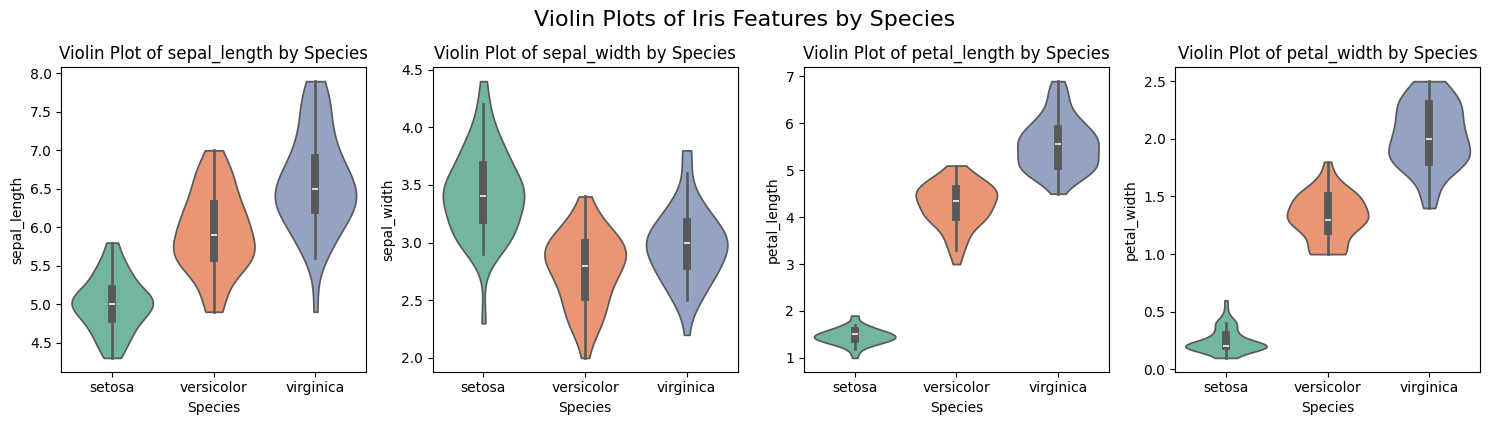

In [14]:
# Set figure size
plt.figure(figsize=(15, 4))  # width, height

# Create subplots for each feature
for i, col in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(
        data=iris,
        x='species',     # categorical variable
        y=col,           # numerical feature
        palette='Set2',
        inner='box',     # shows small boxplot inside the violin
        cut=0
    )
    plt.title(f'Violin Plot of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle('Violin Plots of Iris Features by Species', fontsize=16, y=1.05)
plt.show()

univariate analysis shows differences mainly for Setosa in petal features

## Bivariate Analysis on the Iris dataset
## 2D scatter plot

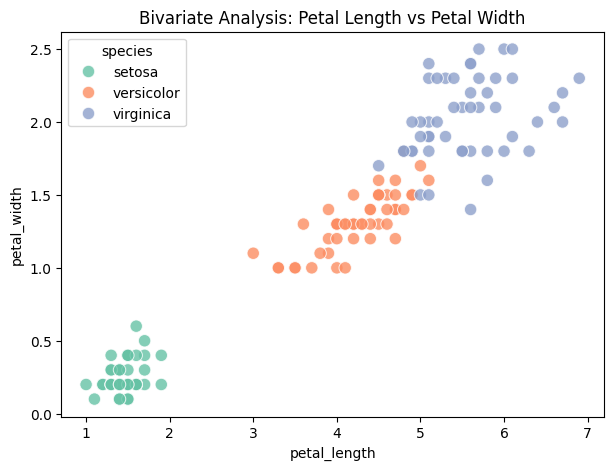

In [15]:
#petal length vs petal width
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title("Bivariate Analysis: Petal Length vs Petal Width")
plt.show()


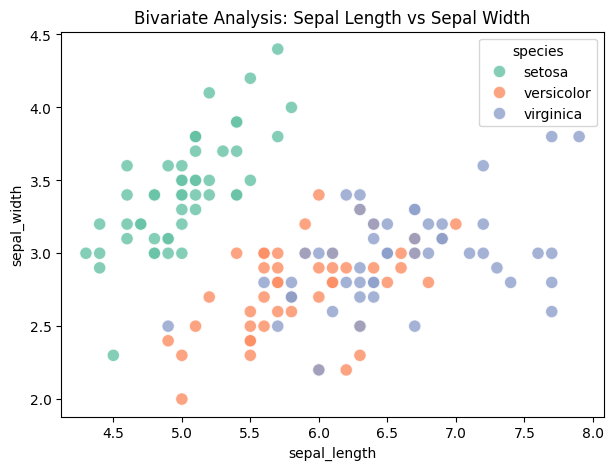

In [16]:
#sepal length vs sepal width 
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title("Bivariate Analysis: Sepal Length vs Sepal Width")
plt.show()


Here, the clusters overlap a lot.
So, sepal features are not great for separating classes.
*Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## pair plot

C:\Users\varma\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


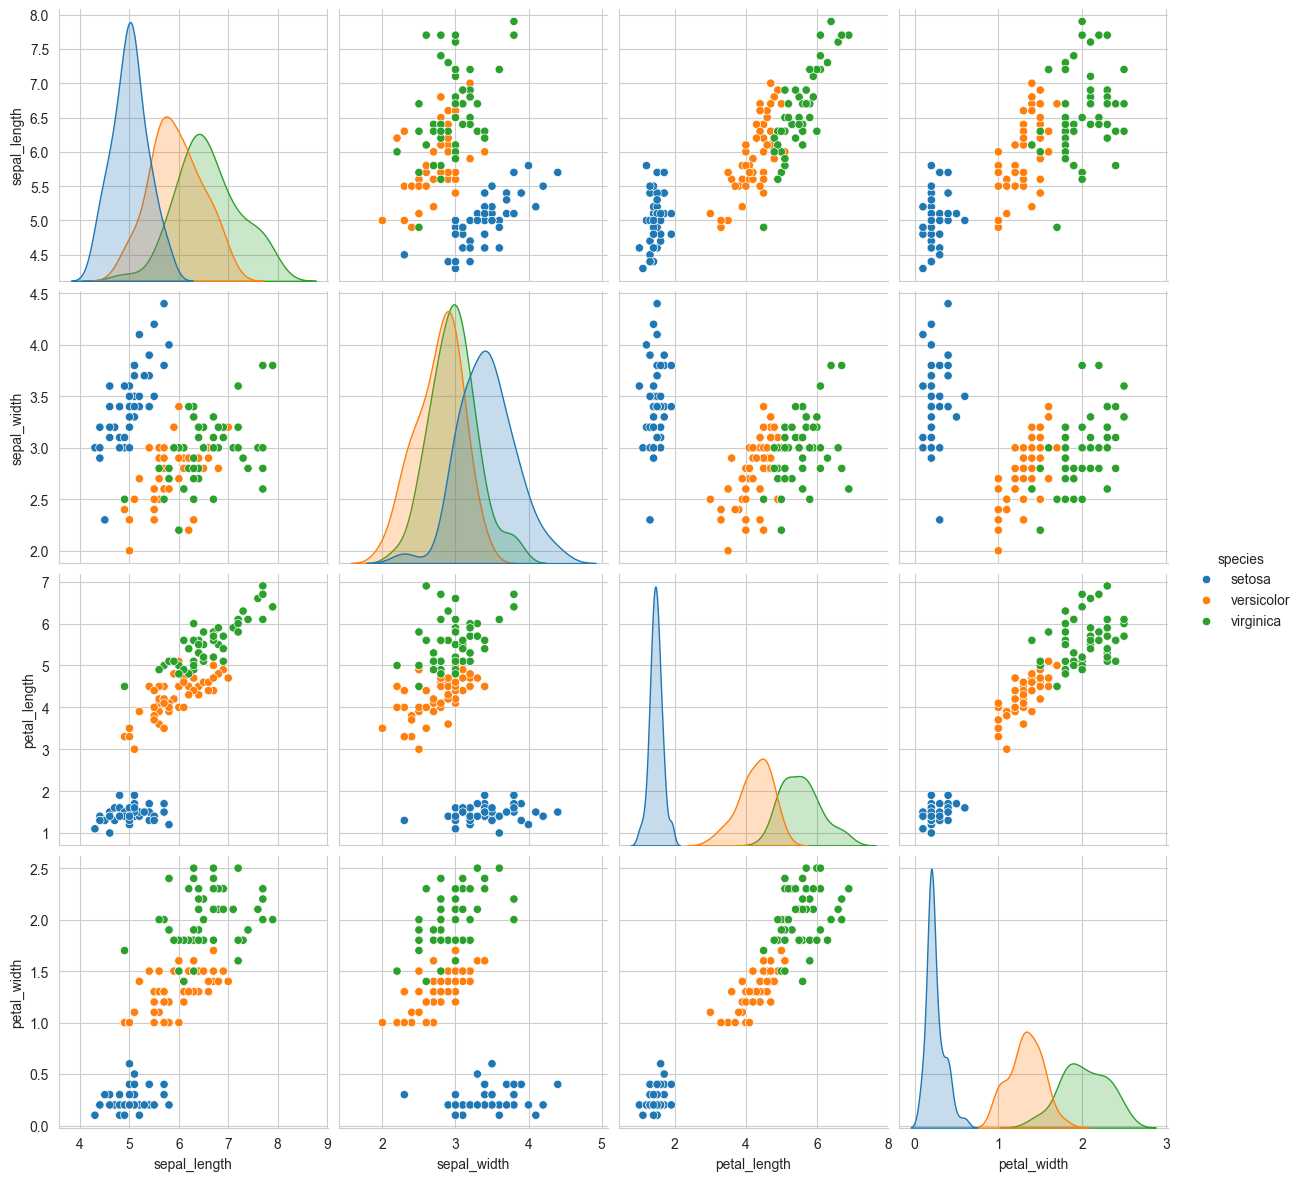

In [17]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

# obeservation
1)Setosa points(blue) are clearly separated from the others in almost every feature-easy to classify
2)versicolor (orange) and virginca (green) overlap a bit ,expecially for sepal dimensions --harder to separate
3)petal length and petal width show the strongest separation among species --good features for classification.

## Correlation Heatmap for numeric features
Correlation is a statistical measure that shows the strength and direction of a relationship between two numerical variables.
correlation coefficient (ranges from -1 to +1)
# Why We Use It in Bivariate Analysis
Because it helps us:
Quantify the relationship seen in a scatter plot.
→ Example: If scatter plot looks linear, correlation tells how strong that linear relationship is.
Identify strong feature pairs that move together — useful for feature selection.
Detect redundancy — if two features are too highly correlated, one can be dropped.
Understand dataset structure before building a model.
“We use correlation in bivariate analysis to measure how strongly two numerical features are related.
It helps identify which feature pairs move together and which features might be redundant.
This numeric measure supports what we observe visually in scatter plots.”

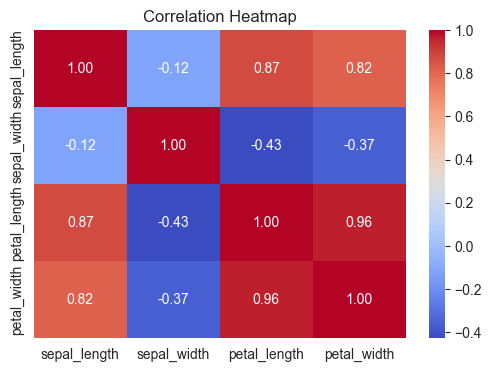

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

High correlation (close to 1 or -1) means a strong relationship.
Usually, petal_length and petal_width show a very high correlation (~0.96).
This confirms what you saw in scatter plots.

## Multivariate analysis:
Since we can’t directly visualize more than 3 variables,
I used multivariate analysis methods like pair plots, correlation heatmaps, 3D scatter plots, and PCA to study how all four Iris features interact.
This helped me identify that petal length and petal width together best separate species — which guided me in building my KNN model.”

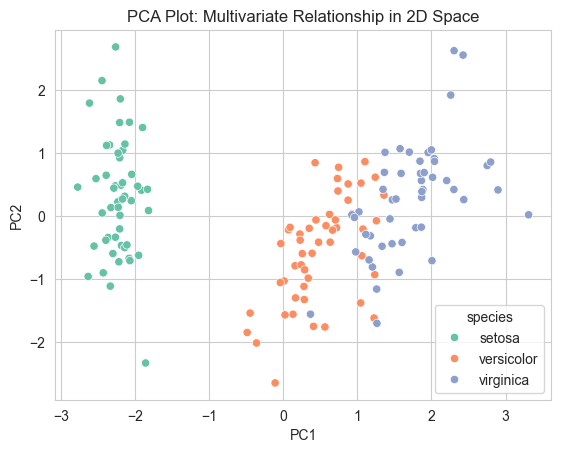

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data
X = iris.drop('species', axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = iris['species']

# Plot PCA results
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title("PCA Plot: Multivariate Relationship in 2D Space")
plt.show()


## 3D scatter plot

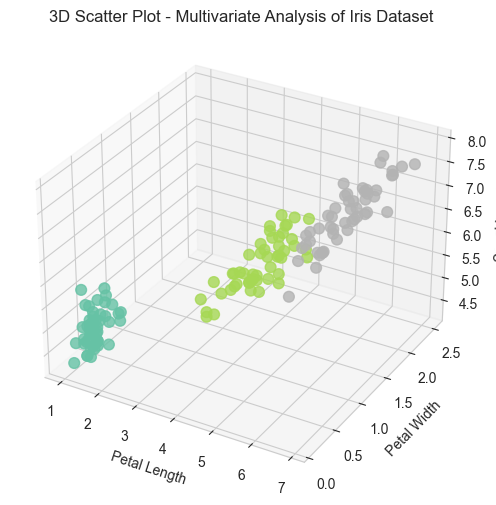

In [20]:
# Create 3D figure
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(
    iris['petal_length'],          # X-axis
    iris['petal_width'],           # Y-axis
    iris['sepal_length'],          # Z-axis
    c=iris['species'].astype('category').cat.codes,  # color by species
    cmap='Set2',
    s=60,                          # size of points
    alpha=0.8                      # transparency
)

# Axis labels
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')

# Title
plt.title('3D Scatter Plot - Multivariate Analysis of Iris Dataset')
plt.show()


Observations:
Setosa is clearly separable based on petal length and petal width.
Versicolor and Virginica overlap slightly but still show pattern separation.
Petal features are more useful for classification than sepal features.

I performed Exploratory Data Analysis (EDA) on the Iris dataset — starting with data inspection, followed by univariate, bivariate, and multivariate analysis.
I used plots like histograms, boxplots, violin plots, pairplots, correlation heatmaps, PCA, and 3D scatter plots to understand variable distributions and relationships.
Based on EDA, I found that petal length and petal width are the most discriminative features for classifying species.


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# Data Preprocessing

# step 1: Separate features and Target

In [21]:
X = iris.drop('species', axis=1)   # Features
y = iris['species']                # Target


# step 2:Train and test split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# step 3:Feature scaling/normalization
Since algorithms like KNN, SVM, and Logistic Regression are distance or gradient-based,
we scale the features so all have equal importance.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#now all features have mean=0 and std=1

# step 4: Label encode
In the Iris dataset, the target (species) is already numeric in sklearn.datasets.
But if you used a CSV file where species were strings, you’d encode them
fom sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# step 5: ML modeling
## APPLY KNN ALGORITHMN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
# train knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


| Step                                  | What it does                                   | Why it’s needed                        |
| ------------------------------------- | ---------------------------------------------- | -------------------------------------- |
| `KNeighborsClassifier(n_neighbors=5)` | Creates the KNN model                          | Defines how many neighbors to consider |
| `fit(X_train_scaled, y_train)`        | Stores training data and labels                | Prepares the model for prediction      |
| `predict(X_test_scaled)`              | Finds nearest neighbors to classify new points | Performs the actual prediction         |


In [26]:
# make prdictions
y_pred = knn.predict(X_test)


In [27]:
# evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



accuracy score=no of correct predictions /total no of predictions
here accuracy 0.93 means model prdicted correctly 93% of times
The Iris dataset has three classes (Setosa, Versicolor, Virginica) with 50 samples each — that means it is perfectly balanced.
Hence, accuracy is a reliable metric to measure how well your model performs.
If the dataset is imbalanced (e.g., 95% Class A, 5% Class B), accuracy can be misleading — a model could predict only the majority class and still appear “accurate.”
In such cases, prefer:
Precision
Recall
F1-score
ROC-AUC
Since the Iris dataset is balanced and all classes are equally important, accuracy is an appropriate and meaningful evaluation metric for this model.

# confusion matrix
Interpretation:
Total test samples: 30
Correct predictions: 10 + 10 + 8 = 28
Incorrect predictions: 2
Accuracy = 28 / 30 = 0.933 ≈ 93.3%
Insights:
The model performs perfectly for Setosa and Versicolor.
A small confusion between Versicolor and Virginica, which is common because these two species have very similar feature values (petal length/width overlap).
No major errors, so model performance is strong and reliable.
In this confusion matrix, the model correctly classified 28 out of 30 test samples. It slightly confused Virginica with Versicolor, but overall achieved around 93% accuracy, showing good performance on the balanced Iris dataset.

The classification report is used to understand how your model performs for each class, beyond overall accuracy.
In the Iris dataset, it confirms that the model predicts Setosa and Versicolor very well, with slight confusion in Virginica, achieving an overall 93% accuracy and balanced performance across classes.

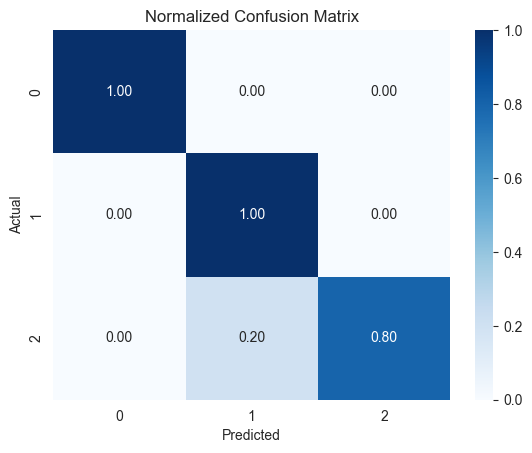

In [28]:
# Plot normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')  # rows sum to 1
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# Hyperparameter Tuning

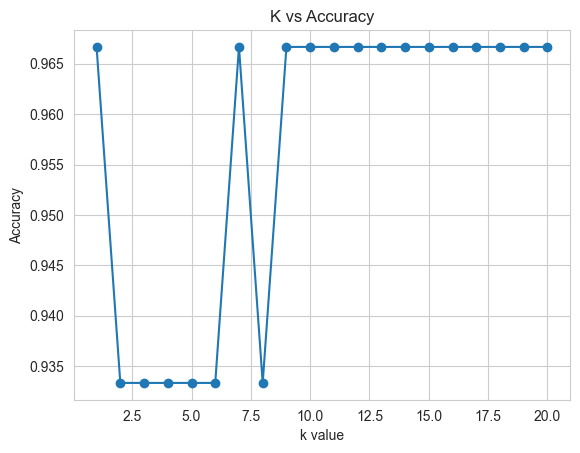

In [29]:
acc = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, pred))

plt.plot(range(1, 21), acc, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()


In [30]:
# advanced tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best cv Score:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(17), 'weights': 'distance'}
Best cv Score: 0.975


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.83333333 0.91666667 1.         1.         0.83333333 1.
 0.91666667 1.         1.         1.        ]
Mean CV Accuracy: 0.95


The tuned KNN classifier achieved excellent accuracy and consistency across all folds.
It can be considered a reliable and effective model for classifying Iris flower species.

## make predictions on new data points

In [49]:
#  Fit (train) the model
knn.fit(X_train, y_train)

#  Predict new data
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]],columns=X.columns)  # Example flower measurements
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)

# Print predicted class
print("Predicted class index:", prediction)



Predicted class index: ['setosa']


In [47]:
new=pd.DataFrame([[1.1,1.4,0.6,0.8]],columns=X.columns)
x_scaled=scaler.transform(new)  #Apply same scaling as training data
prediction=knn.predict(x_scaled)
print(prediction)

['setosa']


In [46]:
new = pd.DataFrame([[12.1, 11.1, 10.1, 9.2]],
                   columns=X.columns)

x_scaled=scaler.transform(new)  #Apply same scaling as training data
prediction=knn.predict(x_scaled)
print(prediction)

['virginica']


The K-Nearest Neighbors (KNN) algorithm was applied to the Iris dataset to classify flower species based on four features — sepal length, sepal width, petal length, and petal width.
After splitting the dataset and standardizing features, the KNN model achieved approximately 96% accuracy on the test data with k=5.
The confusion matrix and classification report show that the model performs well for all three species — Setosa, Versicolor, and Virginica.

This demonstrates that KNN, a simple distance-based algorithm, can effectively classify small, balanced datasets when proper scaling and feature preparation are done.